<a href="https://colab.research.google.com/github/yuhui-0611/ESAA/blob/main/ESAA_YB_WEEK04_1_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# < 사이킷런으로 시작하는 머신러닝 >

# **1. 사이킷런 소개와 특징**

사이킷런(scikit-learn)은 파이썬 머신러닝 라이브러리 중 가장 많이 사용되는 라이브러리
- 사이킷런 특징
1.  파이썬 기반의 다른 머신러닝 패키지도 사이킷런 스타일의 API를 지향할 정도로 쉽고 가장 파이썬스러운 API를 제공
2.  머신러닝을 위한 매우 다양한 알고리즘과 개발을 위한 편리한 프레임워크와 API를 제공
3.  오랜 기간 실전 환경에서 검증됐으며, 매우 많은 환경에서 사용되는 성숙한 라이브러리

- Anaconda를 설치하면 기본으로 사이킷런까지 설치가 완료되기에 별도의 설치가 필요 없음
- 하지만 사이킷런의 버전 업그레이드가 여전히 활발히 진행되고 있기에 이 책의 현재 시점에서 최신 버전인 1.0.2에서 모든 실습 코드를 테스트함
- 사이킷런 최신 버전 1.0.2를 설치하려면 아나콘다 Prompt를 열고 아래와 같이 pip를 이용해 설치하면 됨

In [1]:
pip install scikit-learn==1.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 58.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


- 시간이 지나면서 좀 더 최신 버전의 사이킷런을 설치하고자 한다면 pip install -U scikit-learn으로
설치하면 됨
- 아래는 사이킷런 재설치가 완료된 후의 버전 확인 코드

In [2]:
import sklearn
print(sklearn.__version__)

# 최신 버전이 1.6.1이며 환경에 원래 이 버전이 있었음

1.6.1


# **2. 첫 번째 머신러닝 만들어보기 - 붓꽃 품종 예측하기**

- 사이킷런을 통해 첫 번째로 만들어볼 머신러닝 모델은 붓꽃 데이터 세트로 붓꽃의 품종을 분류하는 것
- 붓꽃 데이터 세트는 꽃잎의 길이와 너비, 꽃받침의 길이와 너비 피처(Feature)를 기반으로 꽃의 품종을 예측하기 위한 것

- 분류(Classification)는 대표적인 지도학습 방법의 하나
- 지도학습은 학습을 위한 다양한 피처와 분류 결정값인 레이블(Label) 데이터로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 미지의 레이블을 예측
- 즉 지도학습은 명확한 정답이 주어진 데이터를 먼저 학습한 뒤 미지의 정답을 예측하는 방식
- 이때 학습을 위해 주어진 데이터 세트를 '학습 데이터 세트', 머신러닝 모델의 예측 성능을 평가하기 위해 별도로 주어진 데이터 세트를 '테스트 데이터 세트'로 지칭


- 먼저 사이킷런에서 사용할 모듈을 임포트
- 사이킷런 패키지 내의 모듈명은 sklearn으로 시작하는 명명규칙이 있음
- sklearn.datasets 내의 모듈은 사이킷런에서 자체적으로 제공하는 데이터 세트를 생성하는 모듈의 모임
- sklearn.tree 내의 모듈은 트리 기반 ML 알고리즘을 구현한 클래스의 모임
- sklearn.model_selection은 학습 데이터와 검증 데이터, 예측 데이터로 데이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈의 모임
- 하이퍼 파라미터란 머신러닝 알고리즘별로 최적의 학습을 위해 직접 입력하는 파라미터들을 통칭하며, 하이퍼 파라미터를 통해 머신러닝 알고리즘의 성능을 튜닝할수 있음
- 붓꽃 데이터 세트를 생성하는 데는 load_iris()를 이용하며, ML 알고리즘은 의사 결정 트리(Decision Tree) 알고리즘으로, 이를 구현한 DecisionTreeClassifier를 적용
- 데이터 세트를 학습 데이터와 테스트 데이터로 분리하는 데는 train_test_split() 함수를 사용할 것


In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

load_iris() 함수를 이용해 붓꽃 데이터 세트를 로딩한 후, 피처들과 데이터 값이 어떻게 구성돼 있는지 확인하기 위해 DataFrame으로 변환

In [4]:
import pandas as pd

# 붓꽃 데이터 세트를 로딩
iris = load_iris()

# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있음
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있음
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(5)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   label  
0      0  
1      0  
2      0  
3      0  
4      0

In [5]:
iris_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

- 피처에는 sepal length, sepal width, petal length, petal width가 있음
- 레이블(Label, 결정값)은 0, 1, 2 세 가지 값으로 돼 있으며 0이 Setosa 품종, 1 이 versicolor 품종, 2가 virginica 품종을 의미

- 학습용 데이터와 테스트용 데이터는 반드시 분리해야 함
- 학습 데이터로 학습된 모델이 얼마나 뛰어난 성능을 가지는지 평가하려면 테스트 데이터 세트가 필요하기 때문
- 이를 위해 사이킷런은 train_test_split() API를 제공
- train_test_split()을 이용하면 학습 데이터와 테스트 데이터를 test_size 파라미터 입력값의 비율로 쉽게 분할
- 예를 들어 test_size=0.2로 입력 파라미터를 설정하면 전체 데이터 중 테스트 데이터가 20%, 학습 데이터가 80%로 데이터를 분할
- 먼저 train_test_split()을 호출한 후 좀 더 자세히 입력 파라미터와 반환 값을 살펴보고자 함

In [6]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

- train_test_split()의 첫 번째 파라미터인 iris_data는 피처 데이터 세트
- 두 번째 파라미터인 iris_label은 레이블(Label) 데이터 세트
- 그리고 test_size=0.2는 전체 데이터 세트 중 테스트
데이터 세트의 비율
- 마지막으로 random_state는 호출할 때마다 같은 학습/테스트 용 데이터 세트를 생성하기 위해 주어지는 난수 발생 값
- train_test_split()는 호출 시 무작위로 데이터를
분리하므로 random_state를 지정하지 않으면 수행할 때마다 다른 학습/테스트 용 데이터를 만들 수 있음
- 본 예제는 실습용 예제이므로 수행할 때마다 동일한 데이터 세트로 분리하기 위해 random_state를 일정한 숫자 값으로 부여함 (random_state는 random값을 만드는 seed와 같은 의미이며, 숫자 자체는 어떤 값을 지정해도 상관없음)
- 위 예제에서 train_test_split()은 학습용 피처 데이터 세트를 X_train으로, 테스트용 피처 데이터 세트
를 X_test로, 학습용 레이블 데이터 세트를 y_train으로, 테스트용 레이블 데이터 세트를 y_test로 반환함
- 이제 학습 데이터를 확보했으니 이 데이터를 기반으로 머신러닝 분류 알고리즘의 하나인 의사 결정 트리를 이용해 학습과 예측을 수행해 볼 예정
- 먼저 사이킷런의 의사 결정 트리 클래스인 DecisionTreeClassifier를 객체로 생성(DecisionTreeClassifier 객체 생성 시 입력된
random_state=11 역시 예제 코드를 수행할 때마다 동일한 학습/예측 결과를 출력하기 위한 용도로만
사용됨)
- 생성된 DecisionTreeClassifier 객체의 fit() 메서드에 학습용 피처 데이터 속성과 결정 값 데이터 세트를 입력해 호출하면 학습을 수행

In [7]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

- 이제 의사 결정 트리 기반의 DecisionTreeClassifier 객체는 학습 데이터를 기반으로 학습이 완료된 상태
- 이렇게 학습된 DecisionTreeClassifier 객체를 이용해 예측을 수행
- 예측은 반드시 학습 데이터가 아닌 다른 데이터를 이용해야 하며, 일반적= 테스트 데이터 세트를 이용
- DecisionTreeClassifier 객체의 predict() 메서드에 테스트용 피처 데이터 세트를 입력해 호출하면 학습된 모델 기반에서 테스트 데이터 세트에 대한 예측값을 반환

In [8]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = dt_clf.predict(X_test)

- 예측 결과를 기반으로 의사 결정 트리 기반의 DecisionTreeClassifier의 예측 성능을 평가
- 일반적으로 머신러닝 모델의 성능 평가 방법은 여러 가지가 있으나, 여기서는 정확도를 측정
- 정확도는 예측 결과가 실제 레이블 값과 얼마나 정확하게 맞는지를 평가하는 지표
- 정확도 식 = 맞게 예측한 개수/전체 데이터 개수
- 예측한 붓꽃 품종과 실제 테스트 데이터 세트의 붓꽃 품종이 얼마나 일치하는지 확인
- 사이킷런은 정확도 측정을 위해 accuracy_score() 함수를 제공
- accuracy_score()의 첫 번째 파라미터로 실제 레이블 데이터 세트, 두 번째 파라미터로 예측 레이블 데이터 세트를 입력하면 됨

In [9]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))
# '{인덱스:형식}'.format(값1, 값2,...)
# 인덱스 = format() 안에 전달된 값의 순서를 지정(0부터 시작)
# 형식 = 출력 형식을 지정(소수점 아래 4자리까지 출력)

예측 정확도: 0.9333


In [10]:
# 정확도 반환
# y_test = 실제 정답, pred = 모델이 예측한 값
accuracy_score(y_test, pred)

0.9333333333333333

<정리>
1.   데이터 세트 분리: 데이터를 학습 데이터와 테스트 데이터로 분리
2. 모델 학습: 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델을 학습시킴
3. 예측 수행: 학습된 ML 모델을 이용해 테스트 데이터의 분류(즉, 붓꽃 종류)를 예측
4. 평가: 이렇게 예측된 결괏값과 테스트 데이터의 실제 결괏값을 비교해 ML 모델 성능을 평가

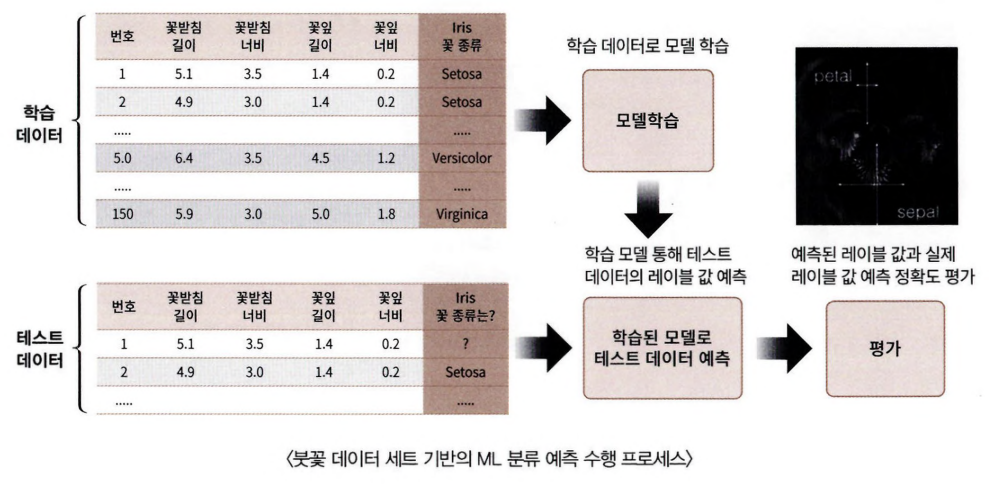

# **3. 사이킷런의 기반 프레임워크 익히기**

**Estimator 이해 및 fit(), predict() 메서드**

- 사이킷런은 ML 모델 학습을 위해서 fit()을, 학습된 모델의 예측을 위해 predict() 메서드를 제공
- 지도학습의 주요 두 축인 분류(Classification)와 회귀(Regression)의 다양한 알고리즘을 구현한 모든 사이킷
런 클래스는 fit()과 predict()만을 이용해 간단하게 학습과 예측 결과를 반환
- 사이킷런에서는 분류 알고리즘을 구현한 클래스를 Classifier로, 회귀 알고리즘을 구현한 클래스를 Regressor로 지칭
- 사이킷런은 매우 많은 유형의 Classifier와 Regressor 클래스를 제공
- 이들 Classifier와 Regressor를 합쳐서 Estimator 클래스라고 부름
- 즉, 지도학습의 모든 알고리즘을 구현한 클래스를 통칭해서 Estimator라고 부름
- 당연히 Estimator 클래스는 fit()과 predict()를
내부에서 구현하고 있음

- cross_val_score( )와 같은 evaluation 함수, GridSearchCV와 같은 하이퍼 파라미터 튜닝을 지원
하는 클래스의 경우 이 Estimator를 인자로 받음
- 인자로 받은 Estimator에 대해서 cross_val_score(), GridSearchCV.fit() 함수 내에서 이 Estimator의 fit()과 predict()를 호출해서 평가를 하거나 하이퍼 파라미터 튜닝을 수행

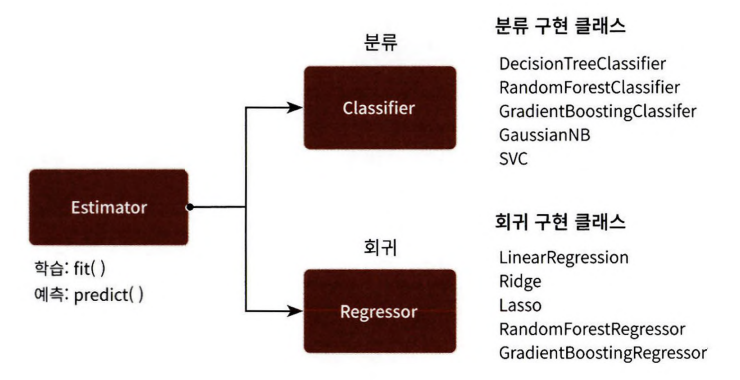

- 사이킷런에서 비지도학습인 차원 축소, 클러스터링, 피처 추출(Feature Extraction) 등을 구현한 클래스 역시 대부분 fit()과 transform()을 적용
- 비지도학습과 피처 추출에서 fit()은 지도학습의 fit()과 같이 학습을 의미하는 것이 아니라 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 작업
- fit()으로 변환을 위한 사전 구조를 맞추면 이후 입력 데이터의 차원 변환, 클러스터 링, 피처 추출 등의 실제 작업은 transform()으로 수행
- 사이킷런은 fit()과 transform()을 하나로 결합한 fit_transform()도 함께 제공
- fit_transform()은 fit()과 transform()을 별도로 호출할 필요를 줄여주지만, 사용에 약간의 주의가 필요
- 비지도학습을 설명하는 단원에서 fit()과 transform()을 개별적으로 적용하는 것과 fit_transform()을 한번에 적용하는 것의 차이를 설명할 예정

**사이킷런의 주요 모듈**

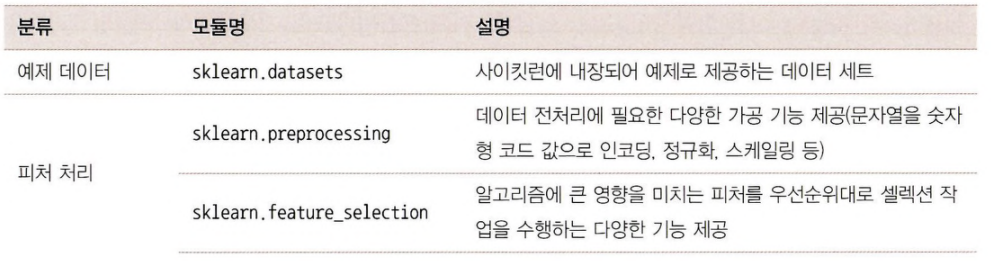
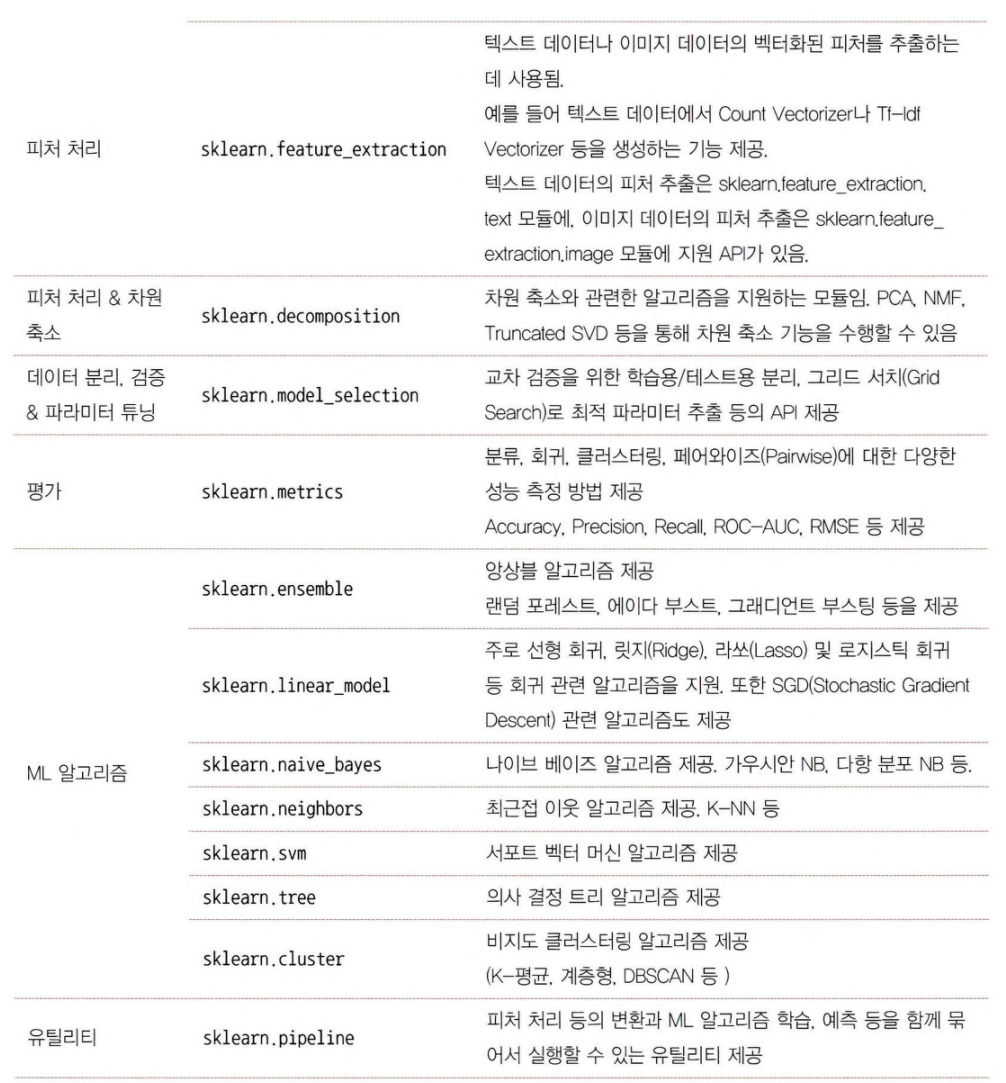

일반적으로 머신러닝 모델을 구축하는 주요 프로세스는 피처의 가공, 변경, 추출을 수행하는 피처 처리(feature processing), ML 알고리즘 학습/예측 수행, 그리고 모델 평가의 단계를 반복적으로 수행하는 것

**내장된 예제 데이터 세트**
- 사이킷런에는 별도의 외부 웹사이트에서 데이터 세트를 내려받을 필요 없이 예제로 활용할 수 있는 간단하면서도 좋은 데이터 세트가 내장돼 있음
- 이 데이터는 datasets 모듈에 있는 여러 API를 호출해 만들 수 있음
- 사이킷런에 내장 되어 있는 데이터 세트는 분류나 회귀를 연습하기 위한 예제용도의 데이터 세트와 분류나 클러스터링을 위해 표본 데이터로 생성될 수 있는 데이터 세트로 나뉘어짐

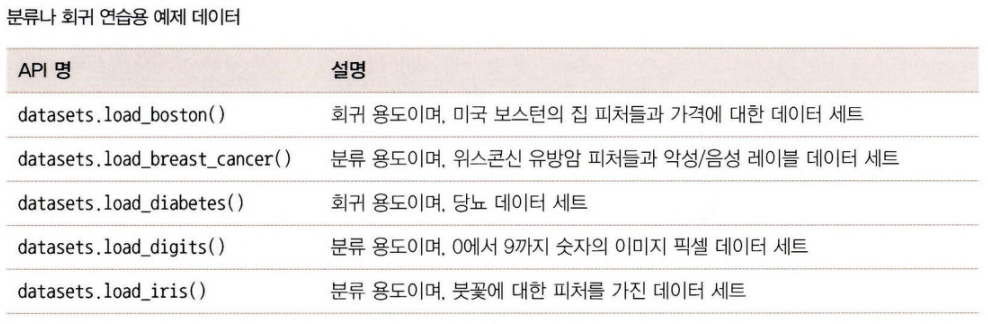

- fetch 계열의 명령은 데이터의 크기가 커서 패키지에 처음부터 저장돼 있지 않고 인터넷에서 내려받아 홈 디렉터리 아래의 scikit_learn_data라는 서브디렉터리에 저장한 후 추후 불러들이는 데이터
- 따라서 최초 사용 시에 인터넷에 연결돼 있지 않으면 사용할 수 없음

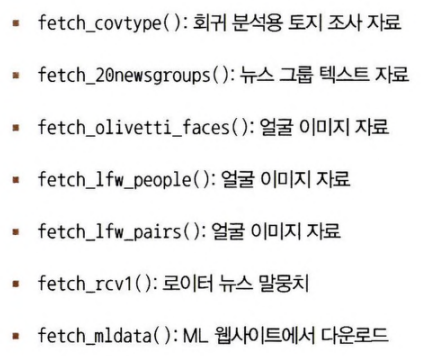
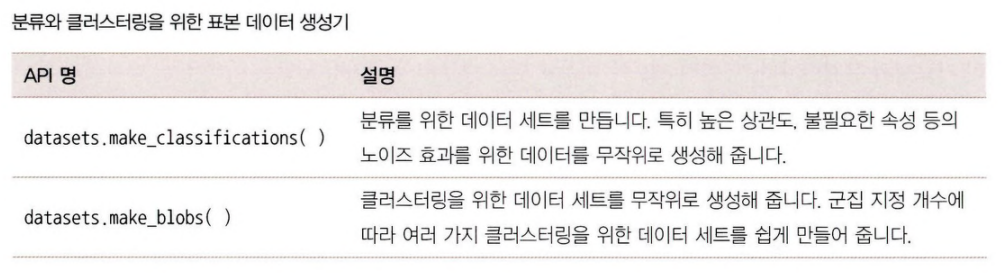

분류나 회귀를 위한 연습용 예제 데이터 구성
- 사이킷런에 내장된 이 데이터 세트는 일반적으로 딕셔너리 형태로 돼 있음
- 키는 보통 data, target, target_name, feature_names, DESCR로 구성돼 있음
- 개별 키가 가리키는 데이터 세트의 의미는 다음과 같음

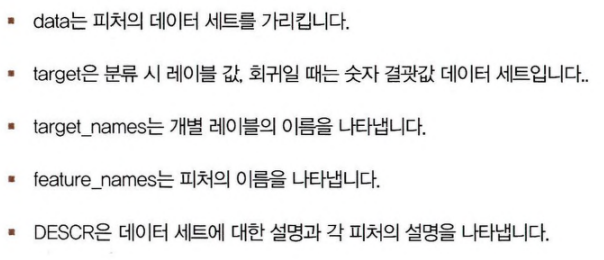

- data, target은 넘파이 배열(ndarray) 타입이며, targetjnames, feature_names는 넘파이 배열 또는 파이썬 리스트(list) 타입
- DESCR은 스트링 타입
- 피처의 데이터 값을 반환받기 위해서는 내장 데이터 세트 API를 호출한 뒤에 그 Key값을 지정하면 됨
- 먼저 붓꽃 데이터 세트를 생성

In [5]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils._bunch.Bunch'>


- load_iris() API의 반환 결과는 sklearn.utils.Bunch 클래스
- Bunch 클래스는 파이썬 딕셔너리 자료형과 유사
- 데이터 세트에 내장돼 있는 대부분의 데이터 세트는 이와 같이 딕셔너리 형태의 값을 반환
- 아래는 딕셔너리 형태의 load_iris() 데이터 세트의 key 값을 확인하는 코드
- 이들 중 data, target, target_names, feature_names가 주요한 key 값

In [6]:
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들:', keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


- 데이터 키는 피처들의 데이터 값을 가리킴
- 데이터 세트가 딕셔너리 형태이기 때문에 피처 데이터
값을 추출하기 위해서는 데이터 세트.data(또는 데이터 세트['data'])를 이용하면 됨
- 마찬가지로 target, feature_names, DESCR key가 가리키는 데이터 값의 추출도 동일하게 수행하면 됨
- 다음 그림은 load_iris()가 반환하는 붓꽃 데이터 세트의 각 키가 의미하는 값을 표시한 것

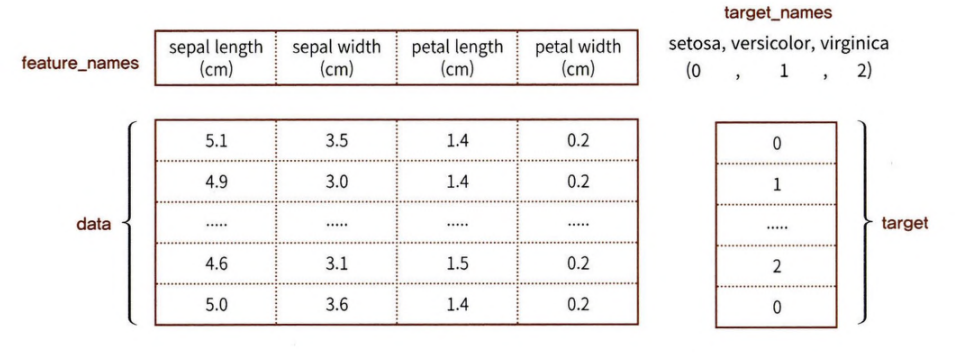

load_iris()가 반환하는 객체의 키인 feature_names, target_name, data, target이 가리키는 값을 다음 예제 코드에 출력

In [13]:
print('\nfeature_names의 type:', type(iris_data.feature_names))
print('feature_names의 shape:', len(iris_data.feature_names))
print(iris_data.feature_names)

print('\ntarget_names의 type:', type(iris_data.target_names))
print('target_names의 shape:', len(iris_data.target_names))
print(iris_data.target_names)

print('\ndata의 type:', type(iris_data.data))
print('data의 shape:', iris_data.data.shape)
print(iris_data['data'])

print('\ntarget의 type:', type(iris_data.target))
print('target의 shape:', iris_data.target.shape)
print(iris_data.target)


feature_names의 type: <class 'list'>
feature_names의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

target_names의 type: <class 'numpy.ndarray'>
target_names의 shape: 3
['setosa' 'versicolor' 'virginica']

data의 type: <class 'numpy.ndarray'>
data의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5

#**4. Model Selection 모듈 소개**

사이킷런의 model_selection 모듈은 학습 데이터와 테스트 데이터 세트를 분리하거나 교차검증 분할 및 평가, 그리고 Estimator의 하이퍼 파라미터를 튜닝하기 위한 다양한 함수와 클래스를 제공

**학습/테스트 데이터 세트 분리 - train_test_split()**

In [7]:
from sklearn.datasets import load_iris   # 사이킷런이 제공하는 붓꽃(iris) 예제 데이터셋을 불러오는 함수
from sklearn.tree import DecisionTreeClassifier   # 결정트리 분류 모델 클래스
from sklearn.metrics import accuracy_score   # 예측값과 실제값을 비교해 정확도를 계산하는 함수

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)
# 학습단계
# 모델객체.fit(입력데이터_X, 정답_y)

# 학습 데이터 세트로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도:', accuracy_score(train_label, pred))

예측 정확도: 1.0


- 정확도가 100%가 된 이유는 이미 학습한 학습 데이터 세트를 기반으로 예측했기 때문
- 예측을 수행하는 데이터 세트는 학습을 이미 수행한 학습용 데이터 세트가 아닌 전용 테스트 데이터 세트여야 함
- train_test_split()을 통해 원본 데이터 세트에서 학습 및 테스트 데이터 세트를 쉽게 분리할 수 있음
- trian_test_split()을 이용해 붓꽃 데이터 세트를 학습 및 테스트 데이터 세트로 분리
- train_test_split()는 첫 번째 파라미터로 피처 데이터 세트, 두 번째 파라미터로 레이블 데이터 세트를 입력받고 선택적으로 다음 파라미터를 입력받음

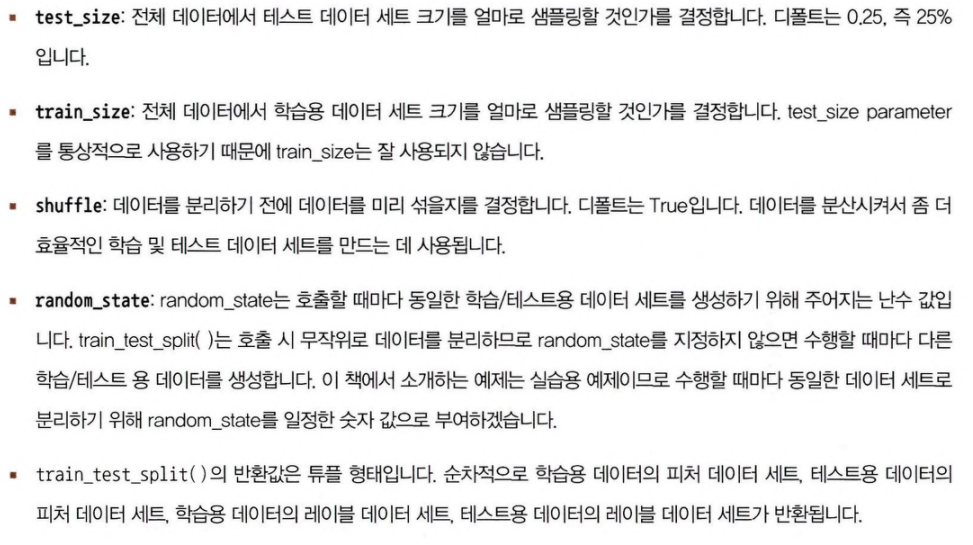

다음으로 붓꽃 데이터 세트를 train_test_split()을 이용해 테스트 세트를 전체의 30%로, 학습 세트를 70%로 분리 (앞의 예제와 다르게 random_state=121로 변경해 데이터 세트 변화)

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.3, random_state=121)

학습 데이터 기반 DecisionTreeClassifier을 학습하고 이 모델을 이용해 예측 정확도 측정

In [9]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9556


- 테스트 데이터로 예측을 수행한 결과 정확도가 약 95.56%
- 붓꽃 데이터는 150개의 데이터로 데이터 양이 크지 않아 전체의 30% 정도인 테스트 데이터는 45개 정도밖에 되지 않으므로 이를 통해 알고리즘 예측 성능을 판단하기에는 그리 적절한 것은 아님
- 학습을 위한 데이터 양을 일정 수준 이상으로 보장하는 것도 중요하지만, 학습된 모델에 대해 다양한 데이터를 기반으로 예측 성능을 평가해보는 것도 매우 중요

**교차검증**

- 앞에서 알고리즘을 학습시키는 학습 데이터와 이에 대한 예측 성능을 평가하기 위한 별도의 테스트용
데이터가 필요하다고 말했음
- 하지만 이 방법 역시 과적합(Overfitting)에 취약한 약점을 가질 수 있음
- 과적합은 모델이 학습 데이터에만 과도하게 최적화되어, 실제 예측을 다른 데이터로 수행할 경우에는 예측 성능이 과도하게 떨어지는 것을 말함
- 그런데 고정된 학습 데이터와 테스트 데이터로 평가를 하다 보면, 테스트 데이터에만 최적의 성능을 발휘할 수 있도록 편향되게 모델을 유도하는 경향이 생기게 됨
- 결국은 해당 테스트 데이터에만 과적합되는 학습 모델이 만들어져 다른 테스트용 데이터가 들어올 경우에는 성능이 저하
- 이러한 문제점을 개선하기 위해 교차 검증을 이용해 더
다양한 학습과 평가를 수행
- 교차 검증을 좀 더 간략히 설명하자면, 본고사를 치르기 전에 모의고사를 여러 번 보는 것
- 즉, 본 고사가 테스트 데이터 세트에 대해 평가하는 거라면, 모의고사는 교차 검증에서 많은 학습과 검증 세트에서 알고리즘 학습과 평가를 수행하는 것
- ML은 데이터에 기반하고 데이터는 이상치, 분포도, 다양한 속성값, 피처 중요도 등 여러 가지 ML에 영향을 미치는 요소를 가지고 있음
- 특정 ML 알고리즘에서 최적으로 동작할 수 있도록 데이터를 선별해 학습한다면 실제 데이터 양식과는 많은 차이가 있을 것이고 결국 성능 저하로 이어질 것임
- 교차 검증은 이러한 데이터 편중을 막기 위해서 별도의 여러 세트로 구성된 학습 데이터 세트와 검증
데이터 세트에서 학습과 평가를 수행하는 것
- 각 세트에서 수행한 평가 결과에 따라 하이퍼 파라미터 튜닝 등의 모델 최적화를 더욱 손쉽게 할 수 있음
- 대부분의 ML 모델의 성능 평가는 교차 검증 기반으로 1차 평가를 한 뒤에 최종적으로 테스트 데이터 세트에 적용해 평가하는 프로세스
- ML에 사용되는 데이터 세트를 세분화해서 *학습, 검증, 테스트 데이터 세트*로 나눌 수 있음
- 테스트 데이터 세트 외에 별도의 검증 데이터 세트를 둬서 최종 평가 이전에 학습된 모델을 다양하게 평가하는 데 사용

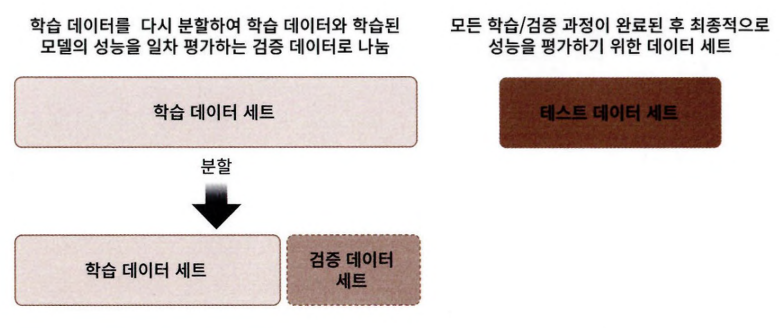

**K 폴드 교차 검증**

- K개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴트 세트에 학습과 검증 평가를 반복적으로 수행하는 방법
- 다음 그림은 5 폴드 교차 검증을 수행한 것(즉, K가 5)
- 5개의 폴드된 데이터 세트를 학습과 검증을 위한 데이터 세트로 변경하면서 5번 평가를 수행한 뒤, 이 5개의 평가를 평균한 결과를 가지고 예측 성능을 평가
- 먼저 데이터 세트를 K등분(5등분)하고 첫 번째 반복에서는 처음부터 4개 등분을 학습 데이터 세트, 마지막 5번째 등분 하나를 검증 데이터 세트로 설정하고 학습 데이터 세트에서 학습 수행, 검증 데이터 세트에서 평가를 수행
- 첫 번째 평가를 수행하고 나면 이제 두 번째 반복에서 다시 비슷한 학습과 평가 작업을 수행
- 단, 이번에는 학습 데이터와 검증 데이터를 변경
- 즉, 처음부터 3개 등분까지, 그리고 마지막 5번째 등분을 학습 데이터 세트로, 4번째 등분 하나를 검증 데이터 세트로 설정

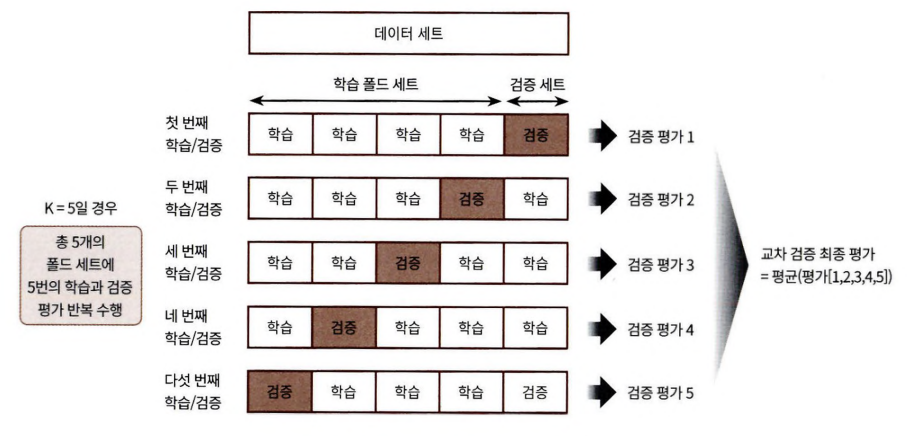

- 이렇게 학습 데이터 세트와 검증 데이터 세트를 점진적으로 변경하면서 마지막 5번째(K번째)까지 학습과 검증을 수행하는 것이 바로 K 폴드 교차 검증
- 5개(K개)의 예측 평가를 구했으면 이를 평균해서 K 폴드 평가 결과로 반영하면 됨
- 사이킷런에서는 K 폴드 교차 검증 프로세스를 구현하기 위해 KFold와 StratifiedKFold 클래스를 제공
- 먼저 KFold 클래스를 이용해 붓꽃 데이터 세트를 교차 검증하고 예측 정확도를 알아볼 예정
- 붓꽃 데이터 세트와 DecisionTreeClassifier를 다시 생성하고 5개의 폴드 세트로 분리하는 KFold 객체를 생성

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성 .
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:', features.shape[0])

붓꽃 데이터 세트 크기: 150


- KFold(n_splits=5)로 KFold 객체를 생성했으니 이제 생성된 KFold 객체의 split()을 호출해 전체 붓꽃 데이터를 5개의 폴드 데이터 세트로 분리
- 전체 붓꽃 데이터는 모두 150개이기에 학습용 데이터 세트는 이 중 4/5인 120개, 검증 테스트 데이터 세트는 1/5인 30개로 분할됨
- KFold 객체는 split()을 호출하면 학습용/검증용 데이터로 분할할 수 있는 인덱스를 반환
- 실제로 학습용/검증용 데이터 추출은 반환된 인덱스를 기반으로 개발 코드에서 직접 수행해야 함
- 다음 예제는 5개의 폴드 세트를 생성하는 KFold 객체의 split()을 호출해 교차 검증 수행 시마다 학습과 검증을 반복해 예측 정확도를 측정하고 split()이 어떤 값을 실제로 반환하는지도 확인해 보기 위해
검증 데이터 세트의 인덱스도 추출하는 코드

In [11]:
n_iter = 0

# KFold 객체의 split()를 호출하면 폴드별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
  # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]
  #학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  n_iter += 1
  # 반복 시마다 정확도 측정
  accuracy = np.round(accuracy_score(y_test, pred), 4)
  train_size = X_train.shape[0]  # shape[0] : 행의 개수
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
        .format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
  cv_accuracy.append(accuracy)

# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


- 5번 교차 검증 결과 평균 검증 정확도는 0.9
- 교차 검증 시마다 검증 세트의 인덱스가 달라짐을 알 수 있음
- 학습 데이터 세트의 인덱스는 수가 많아서 출력하지 않았지만 검증 세트의 인덱스를 보면 교차 검증 시마다 split() 함수가 어떻게 인덱스를 할당하는지 알 수 있음
- 첫 번째 교차 검증에서는 0번 ~ 29번까지, 두 번째는 30번 ~ 59번, 세 번째는 60번  ~ 89번, 네 번째는 90 ~ 119번, 다섯 번째는 120 ~ 149번으로 각각 30개의 검증 세트 인덱스를 생성했고, 이를 기반으로 검증 세트를 추출하게 됨

**Stratified K 폴드**

- Stratified K 폴드는 불균형한 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 K 폴드 방식
- 불균형한 분포도를 가진 레이블 데이터 집합은 특정 레이블 값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우치는 것을 말함
- 대출 사기 데이터를 예측 : 이 데이터 세트는 1억 건이고, 수십 개의 피처와 대출 사기 여부를 뜻하는 레이블(대출 사기: 1, 정상 대출: 0)로 구성돼 있음
- 그런데 대부분의 데이터는 정상 대출일 것
- 그리고 대출 사기가 약 1000건이 있다고 한다면 전체의 0.0001%의 아주 작은 확률로 대출 사기 레이블이 존재
- 이렇게 작은 비율로 1 레이블 값이 있다면 K 폴드로 랜덤하게 학습 및 테스트 세트의 인덱스를 고르더라도 레이블 값인 0과 1의 비율을 제대로 반영하지 못하는 경우가 쉽게 발생
- 즉, 레이블 값으로 1이 특정 개별 반복별 학습/테스트 데이터 세트에는 상대적으로 많이 들어 있고, 다른 반복 학습/테스트 데이터 세트에는 그렇지 못한 결과가 발생
- 대출 사기 레이블이 1 인 레코드는 비록 건수는 작지만 알고리즘이 대출 사기를 예측하기 위한 중요한 피처 값을 가지고 있기 때문에 매우 중요한 데이터 세트
- 따라서 원본 데이터와 유사한 대출 사기 레이블 값의 분포를 학습/테스트 세트에도 유지하는 게 매우 중요
- Stratified K 폴드는 이처럼 K 폴드가 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못하는 경우의 문제를 해결해줌
- 이를 위해 Stratified K 폴드는 원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배함
- 먼저 K 폴드가 어떤 문제를 가지고 있는지 확인해 보고 이를 사이킷런의 StratifiedKFold 클래스를 이용해 개선해 볼 예정
- 이를 위해 붓꽃 데이터 세트를 간단하게 DataFrame으로 생성하고 레이블 값의 분포도를 확인

In [12]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

label
0    50
1    50
2    50
Name: count, dtype: int64

- 레이블 값은 0, 1, 2 값 모두 50개로 동일
- 즉 Setosa 품종, Versicolor 품종, Virginica 품종 모두가 50개
- 이슈가 발생하는 현상을 도출하기 위해 3개의 폴드 세트를 KFold로 생성하고, 각 교차 검증 시마다 생성되는 학습/검증 레이블 데이터 값의 분포도를 확인

In [13]:
kfold = KFold(n_splits = 3)
n_iter = 0

for train_index, test_index in kfold.split(iris_df):
  n_iter += 1
  label_train= iris_df['label'].iloc[train_index]
  label_test= iris_df['label'].iloc[test_index]
  print('## 교차 검증: {0}'.format(n_iter))   # format() 안의 값을 {} 안에 넣음
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 label
1    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    50
Name: count, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 label
0    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
1    50
Name: count, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 label
0    50
1    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
2    50
Name: count, dtype: int64


- 교차 검증 시마다 3개의 폴드 세트로 만들어지는 학습 레이블과 검증 레이블이 완전히 다른 값으로 추출되었음
- 예를 들어 첫 번째 교차 검증에서는 학습 레이블의 1, 2 값이 각각 50개가 추출되었고, 검증 레이블의 0값이 50개 추출되었음
- 학습 레이블은 1, 2밖에 없으므로 0의 경우는 전혀 학습하지 못함
- 반대로 검증 레이블은 0밖에 없으므로 학습 모델은 절대 0을 예측하지 못함
- 이런 유형으로 교차 검증 데이터 세트를 분할하면 검증 예측 정확도는 0이 될 수밖에 없음

- StratifiedKFold는 이렇게 KFold로 분할된 레이블 데이터 세트가 전체 레이블 값의 분포도를 반영하지 못하는 문제를 해결해줌
- 이번에는 동일한 데이터 분할을 StratifiedKFold로 수행하고 학습/검증 레이블 데이터의 분포도를 확인해 볼 예정
- StratifiedKFold를 사용하는 방법은 KFold를 사용하는 방법과 거의 비슷
- 단 하나 큰 차이는 StratifiedKFold는 레이블 데이터 분포도에 따라 학습/검증 데이터를 나누기 때문에 split() 메서드에 인자로 피처 데이터 세트뿐만 아니라 레이블 데이터 세트도 반드시 필요하다는 것 (K 폴드의 경우 레이블 데이터 세트는 split() 메서드의 인자로 입력하지 않아도 무방)
- 폴드 세트는 3개로 설정

In [14]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
# 보통 KFold는 데이터를 단순히 나누지만,
# StratifiedKFold는 각 fold(분할)에서 클래스 비율(label 분포)을 원래 데이터와 비슷하게 유지
n_iter=0
# 데이터를 3개의 fold로 나눔 / 즉, 교차검증을 3회 수행

for train_index, test_index in skf.split(iris_df, iris_df['label']):
                              # skf.split(X, y)는 훈련용 인덱스와 검증용 인덱스를 리턴
  n_iter += 1
  label_train= iris_df['label'].iloc[train_index]
  label_test= iris_df['label'].iloc[test_index]
  print('## 교차 검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 label
2    34
0    33
1    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    17
1    17
2    16
Name: count, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 label
1    34
0    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    17
2    17
1    16
Name: count, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 label
0    34
1    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
1    17
2    17
0    16
Name: count, dtype: int64


- 출력 결과를 보면 학습 레이블과 검증 레이블 데이터 값의 분포도가 거의 동일하게 할당됐음을 알 수 있음
- 전체 150개의 데이터에서 학습으로 100개, 검증으로 50개가 교차 검증 단계별로 할당이 되었음
- 첫 번째 교차 검증에서 100개의 학습 레이블은 0, 1, 2 값이 각각 34, 33, 33개로, 레이블 값별로 거의 동일하게 할당됐고, 50개의 검증 레이블 역시 0, 1, 2 값이 각각 17, 17, 16개로, 레이블 값별로 거의 동일하게 할당됨
- 이렇게 분할이 되어야 레이블 값 0, 1, 2 를 모두 학습할 수 있고, 이에 기반해 검증을 수행할 수 있음

- StratifiedKFold를 이용해 붓꽃 데이터를 교차 검증할 예정
- 다음 코드는 StratifiedKFold를 이용해 데이터를 분리한 것
- 피처 데이터와 레이블 데이터는 앞의 붓꽃 StratifiedKFold 예제에서 추출한 데이터를 그대로 이용

In [15]:
dt_clf = DecisionTreeClassifier(random_state=156)

skf = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

# StratifiedKFold의 split( ) 호출시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skf.split(features, label):
  # split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = features[train_index], features[test_index]  # 학습
  y_train, y_test = label[train_index], label[test_index]        # 검증
  # 학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)

  # 반복 시마다 정확도 측정
  n_iter += 1
  accuracy = np.round(accuracy_score(y_test, pred), 4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
  .format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
  cv_accuracy.append(accuracy)


# 교차 검증별 정화도 및 평균 정확도 계산
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.round(np.mean(cv_accuracy), 4))


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9667


- 3개의 Stratified K 폴드로 교차 검증한 결과 평균 검증 정확도가 약 96.67%로 측정됨
- Stratified K 폴드의 경우 원본 데이터의 레이블 분포도 특성을 반영한 학습 및 검증 데이터 세트를 만들 수 있으므로 왜곡된 레이블 데이터 세트에서는 반드시 Stratified K 폴드를 이용해 교차 검증해야 함
- 일반적으로 분류(Classification)에서의 교차 검증은 K 폴드가 아니라 Stratified K 폴드로 분할돼야 함
- 회귀(Regression)에서는 Stratified K 폴드가 지원되지 않음
- 회귀의 결정값은 이산값 형태의 레이블이 아니라 연속된 숫자값이기 때문에 결정값별로 분포를 정하는 의미가 없기 때문
- 다음은 이러한 교차 검증을 보다 간편하게 제공해주는 사이킷런의 API를 살펴볼 예정

**교차 검증을 보다 간편하게 - cross_val_score()**

- 사이킷런은 교차 검증을 좀 더 편리하게 수행할 수 있게 해주는 API를 제공
- 대표적인 것이 cross_val_score()
- KFold로 데이터를 학습하고 예측하는 코드를 보면,

1.  폴드 세트를 설정하고
2.  for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스를 추출한 뒤
3.  반복적으로 학습과 예측을 수행하고 예측 성능을 반환

- cross_val_score( )는 이런 일련의 과정을 한꺼번에 수행해주는 API
- 다음은 cross_val_score() API의 선언 형태
- " cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
- 이 중 estimator, X, y, scoring, cv가 주요 파라미터
- estimator : 사이킷런의 분류 알고리즘 클래스인 Classifier 또는 회귀 알고리즘 클래스인 Regressor를 의미
- X : 피처 데이터 세트, y : 레이블 데이터 세트, scoring  예측 성능 평가 지표
- cv : 교차 검증 폴드 수를 의미
- cross_yal_score() 수행 후 반환 값은 scoring 파라미터로 지정된 성능 지표 측정값을 배열 형태로 반환
- cross_val_score()는 classifier가 입력되면 Stratified K 폴드 방식으로 레이블값의 분포에 따라 학습/테스트 세트를 분할 (회귀인 경우는 Stratified K 폴드 방식으로 분할할 수 없으므로 K 폴드 방식으로 분할)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증별 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증별 정확도: 0.9667


- cross_val_score( )는 cv로 지정된 횟수만큼 scoring 파라미터로 지정된 평가 지표로 평가 결괏값을 배열로 반환
- 그리고 일반적으로 이를 평균해 평가 수치로 사용
- crossjval_score() API는 내부에서 Estimator 학습(fit), 예측(predict), 평가(evaluation)시켜주므로 간단하게 교차 검증 수행 가능
- 붓꽃 데이터의 cross_val_score() 수행 결과와 앞 예제의 붓꽃 데이터 StratifiedKFold의 수행 결과를 비교해 보면, 각 교차 검증별 정확도와 평균 검증 정확도가 모두 동일함을 알 수 있음
- 이는 cross_val_score()가 내부적으로 StratifiedKFold를 이용하기 때문
- 비슷한 API로 cross_validate()가 있는데, cross_val_score()는 단 하나의 평가 지표만 가능하지
만 cross_validate()는 여러 개의 평가 지표를 반환할 수 있음
- 또한 학습 데이터에 대한 성능 평가 지표와 수행 시간도 같이 제공함

**GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에**

- 하이퍼 파라미터는 머신러닝 알고리즘을 구성하는 주요 구성 요소이며, 이 값을 조정해 알고리즘의 예측
성능을 개선할 수 있음
- 사이킷런은 GridSearchCV API를 이용해 Classifier나 Regressor와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안을 제공
- Grid는 격자라는 뜻으로, 촘촘하게 파라미터를 입력하면서 테스트를 하는 방식
- 예를 들어 결정 트리 알고리즘의 여러 하이퍼 파라미터를 순차적으로 변경하면서 최고 성능을 가지는 파라미터 조합을 찾고자 한다면 다음과 같이 파라미터의 집합을 만들고 이를 순차적으로 적용하면서 최적화를 수
행할 수 있음

In [17]:
grid_parameters = {'max_depth' : [1,2,3],
                   'min_samples_split' : [2,3]
                   }

- 하이퍼 파라미터는 다음과 같이 순차적으로 적용되며, 총 6회에 걸쳐 파라미터를 순차적으로 바꿔 실행하면서 최적의 파라미터와 수행 결과를 도출할 수 있음
- for 루프로 모든 파라미터를 번갈아 입력하면서 학습시키는 방법을 좀 더 유연하게 API 레벨에서 제공한 것
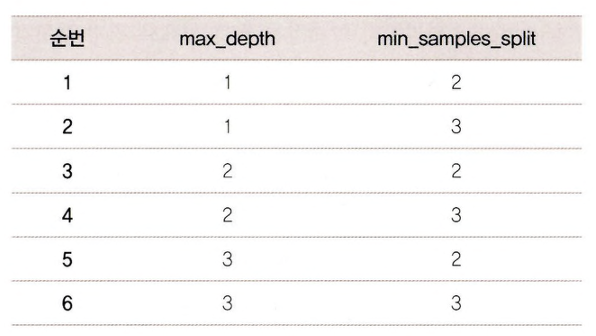

- GridSearchCV는 교차 검증을 기반으로 이 하이퍼 파라미터의 최적 값을 찾게 해줌
- 즉, 데이터 세트를 cross-validation을 위한 학습/테스트 세트로 자동으로 분할한 뒤에 하이퍼 파라미터 그리드에 기술된 모든 파라미터를 순차적으로 적용해 최적의 파라미터를 찾을 수 있게 해줌
- GridSearchCV는 사용자가 튜닝하고자 하는 여러 종류의 하이퍼 파라미터를 다양하게 테스트하면서 최적의 파라미터를 편리하게 찾게 해주지만, 동시에 순차적으로 파라미터를 테스트하므로 수행시간이 상대적으로 오래 걸리는 것에 유념해야 함
- 위의 경우 순차적으로 6회에 걸쳐 하이퍼 파라미터를 변경하면서 교차 검증 데이터 세트에 수행 성능을 측정
- CV가 3회라면 개별 파라미터 조합마다 3개의 폴딩 세트를 3회에 걸쳐 학습/평가해 평균값으로 성능을 측정
- 6개의 파라미터 조합이라면 총 CV 3회 X 6개 파라미터 조합 = 18회의 학습/평가가 이뤄짐
- GridSearchCV 클래스의 생성자로 들어가는 주요 파라미터는 다음과 같음
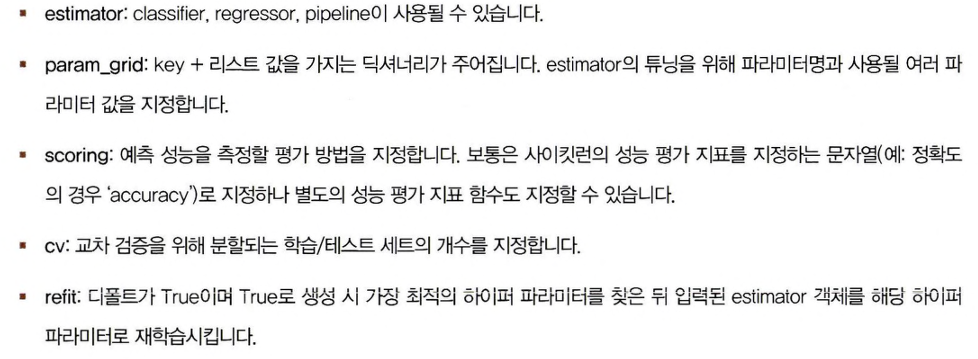

- train_test_split()을 이용해 학습 데이터와 테스트 데이터를 먼저 분리하고 학습 데이터에서 GridSearchCV를 이용해 최적 하이퍼 파라미터를 추출
- 결정 트리 알고리즘을 구현한 DecisionTreeClassifier의 중요 하이퍼 파라미터인 max_depth와 min_samples_split의 값을 변화시키면서 최적화를 진행
- 테스트할 하이퍼 파라미터 세트는 딕셔너리 형태로 하이퍼 파라미터의 명칭은 문자열 Key 값으로, 하이퍼 파라미터의 값은 리스트 형으로 설정

In [18]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

# 파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth' : [1, 2, 3], 'min_samples_split' : [2, 3]}

- 학습 데이터 세트를 GridSearchCV 객체의 fit(학습 데이터 세트) 메서드에 인자로 입력
- GridSearchCV 객체의 fit(학습 데이터 세트) 메서드를 수행하면 학습 데이터를 cv에 기술된 폴딩 세트로 분할해 param_grid에 기술된 하이퍼 파라미터를 순차적으로 변경하면서 학습/평가를 수행하고 그 결과를 cv_results_ 속성에 기록
- cv_results_는 gridsearchcv의 결과 세트로서 딕셔너리 형태로 key 값과 리스트 형태의 value 값을 가짐
- cv_results_를 Pandas의 DataFrame으로 변환하면 내용을 좀 더 쉽게 볼 수 있음

In [19]:
import pandas as pd

# param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행 설정
# refit=True가 default / True이면 가장 좋은 파라미터 설정으로 재학습시킴
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

params  mean_test_score  rank_test_score  \
0  {'max_depth': 1, 'min_samples_split': 2}         0.700000                5   
1  {'max_depth': 1, 'min_samples_split': 3}         0.700000                5   
2  {'max_depth': 2, 'min_samples_split': 2}         0.958333                3   
3  {'max_depth': 2, 'min_samples_split': 3}         0.958333                3   
4  {'max_depth': 3, 'min_samples_split': 2}         0.975000                1   
5  {'max_depth': 3, 'min_samples_split': 3}         0.975000                1   

   split0_test_score  split1_test_score  split2_test_score  
0              0.700                0.7               0.70  
1              0.700                0.7               0.70  
2              0.925                1.0               0.95  
3              0.925                1.0               0.95  
4              0.975                1.0               0.95  
5              0.975                1.0               0.95

- 위의 결과에서 총 6개의 결과를 볼 수 있으며, 이는 하이퍼 파라미터 max_depth와 min_samples_split을 순차적으로 총 6번 변경하면서 학습 및 평가를 수행했음을 나타냄
- 위 결과의 params 칼럼에는 수행할 때마다 적용된 하이퍼 파라미터값을 가지고 있음
- 맨 마지막에서 두 번째 행(인덱스 번호: 4)을 보면 'rank_test_score' 칼럼 값이 1
- 이는 해당 하이퍼 파라미터의 조합인 max_
depth : 3, min_samples_split : 2로 평가한 결과 예측 성능이 1위라는 의미
- 그때의 mean_test_score 칼럼 값을 보면 0.975000으로 가장 높음
- 맨 마지막 행인 인덱스 번호 5번도 rank_test_score값이 1 인데, mean_test_score 값이 0.975000으로 공동 1위라는 의미
- splitO_test_score, splitl_test_score, split2_test_score는 CV가 3인 경우, 즉 3개의 폴딩 세트에서 각각 테스트한 성능 수치
- mean_test_score는 이 세 개 성능 수치를 평균한 것

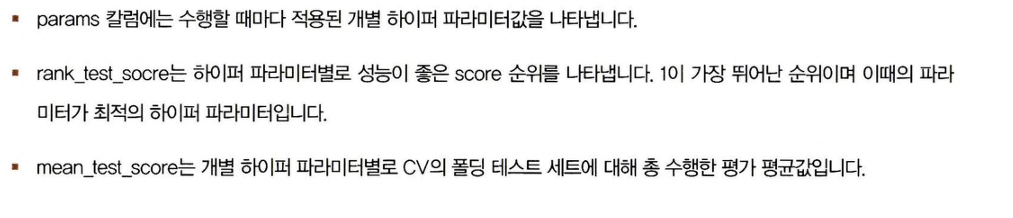

GridSearchCV 객체의 fit()을 수행하면 최고 성능을 나타낸 하이퍼 파라미터의 값과 그때의 평가 결과 값이 각각 best_params_, best_score_ 속성에 기록됨 (즉, cv_results_의 rank_test_score가 1 일 때의 값)

In [20]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.9750


- max_depth가 3, min_samples_split 2일 때 검증용 폴드 세트에서 평균 최고 정확도가 97.50%로 측정됨
- GridSearchCV 객체의 생성 파라미터로 refit=True가 디폴트
- refit=True이면 GridSearchCV가 최적 성능을 나타내는 하이퍼 파라미터로 Estimator를 학습해 best_estimator_로 저장

In [21]:
# GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도: 0.9667


- 별도의 테스트 데이터 세트로 정확도를 측정한 결과 약 96.67%의 결과가 도출됨
- 학습 데이터를 GridSearchCV를 이용해 최적 하이퍼 파라미터 튜닝을 수행한 뒤에 별도의 테스트 세트에서 이를 평가하는 것이 일반적인 머신러닝 모델 적용 방법